<a href="https://colab.research.google.com/github/arksolutionzz/ark/blob/master/sample_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
#from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
from keras.models import Model

# New Section

In [ ]:
import zipfile
with zipfile.ZipFile("/content/dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
import os
import PIL

data_files = os.scandir("./dataset")

X=[]
Y=[]

for data in data_files:
  dpath = data.path
  if dpath.endswith(".png"):
    continue
  mpath = data.path.replace("bmp","png")
  print(dpath,mpath)
  img = PIL.Image.open(dpath)
  mask = PIL.Image.open(mpath).convert('L')
  img = img.resize((256,256))
  mask = mask.resize((256,256))
  X.append(np.array(img)/255.0)
  Y.append((255-np.array(mask))/255.0)



./dataset/092.bmp ./dataset/092.png
./dataset/090.bmp ./dataset/090.png
./dataset/091.bmp ./dataset/091.png
./dataset/069.bmp ./dataset/069.png
./dataset/013.bmp ./dataset/013.png
./dataset/086.bmp ./dataset/086.png
./dataset/063.bmp ./dataset/063.png
./dataset/084.bmp ./dataset/084.png
./dataset/060.bmp ./dataset/060.png
./dataset/037.bmp ./dataset/037.png
./dataset/006.bmp ./dataset/006.png
./dataset/022.bmp ./dataset/022.png
./dataset/053.bmp ./dataset/053.png
./dataset/087.bmp ./dataset/087.png
./dataset/097.bmp ./dataset/097.png
./dataset/019.bmp ./dataset/019.png
./dataset/083.bmp ./dataset/083.png
./dataset/040.bmp ./dataset/040.png
./dataset/028.bmp ./dataset/028.png
./dataset/043.bmp ./dataset/043.png
./dataset/017.bmp ./dataset/017.png
./dataset/078.bmp ./dataset/078.png
./dataset/052.bmp ./dataset/052.png
./dataset/061.bmp ./dataset/061.png
./dataset/025.bmp ./dataset/025.png
./dataset/012.bmp ./dataset/012.png
./dataset/081.bmp ./dataset/081.png
./dataset/098.bmp ./dataset/

In [ ]:
print(np.shape(X))
print(np.shape(Y))

X_train = np.reshape(X,(len(X), 256, 256, 3))
Y_train = np.reshape(Y,(len(X), 256, 256, 1))

(100, 256, 256, 3)
(100, 256, 256)


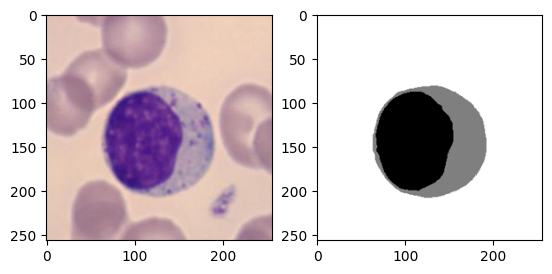

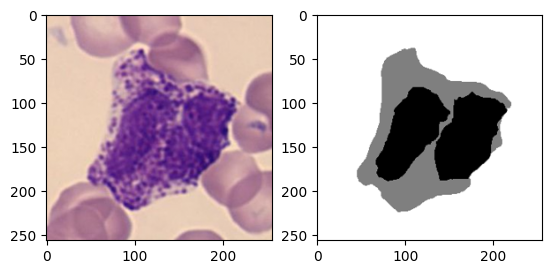

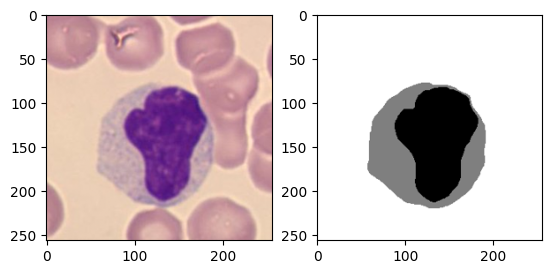

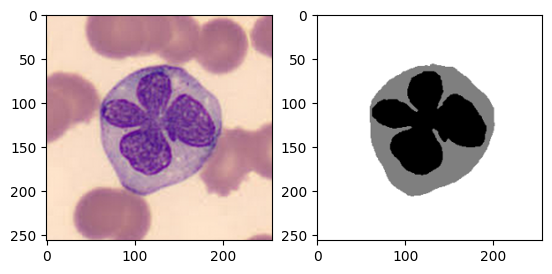

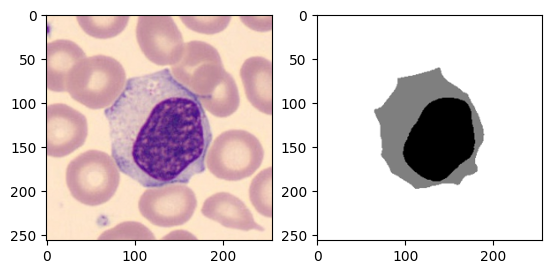

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
  plt.subplot(1, 2, 1)
  plt.imshow(X_train[i])
  plt.subplot(1, 2, 2)
  plt.imshow(Y_train[i], cmap='gray')
  plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose

# Define the convolutional autoencoder with parallel connections
def convolutional_autoencoder(input_shape):
    # Encoder
    input_layer = Input(shape=input_shape, name='input')

    # Convolutional layers with max pooling
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    pool3 = MaxPooling2D((2, 2))(conv3)

    # Decoder
    up1 = UpSampling2D((2, 2))(pool3)
    merge1 = concatenate([conv3, up1], axis=-1)
    conv4 = Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(merge1)

    up2 = UpSampling2D((2, 2))(conv4)
    merge2 = concatenate([conv2, up2], axis=-1)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge2)

    up3 = UpSampling2D((2, 2))(conv5)
    merge3 = concatenate([conv1, up3], axis=-1)
    conv6 = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(merge3)

    # Output layer
    output_layer = Conv2DTranspose(1, (1, 1), activation='sigmoid', padding='same', name='output')(conv6)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='convolutional_autoencoder')
    return model

# Set input shape and number of classes
input_shape = (256, 256, 3)  # Adjust dimensions as per your images
num_classes = 2  # Change according to the number of classes in your segmentation task

# Create the model
model = convolutional_autoencoder(input_shape)

# Compile the model (you can customize the optimizer, loss, and metrics based on your task)
model.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "convolutional_autoencoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_24 (Conv2D)          (None, 256, 256, 32)         896       ['input[0][0]']               
                                                                                                  
 max_pooling2d_18 (MaxPooli  (None, 128, 128, 32)         0         ['conv2d_24[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_25 (Conv2D)          (None, 128, 128, 64)         18496     ['max_

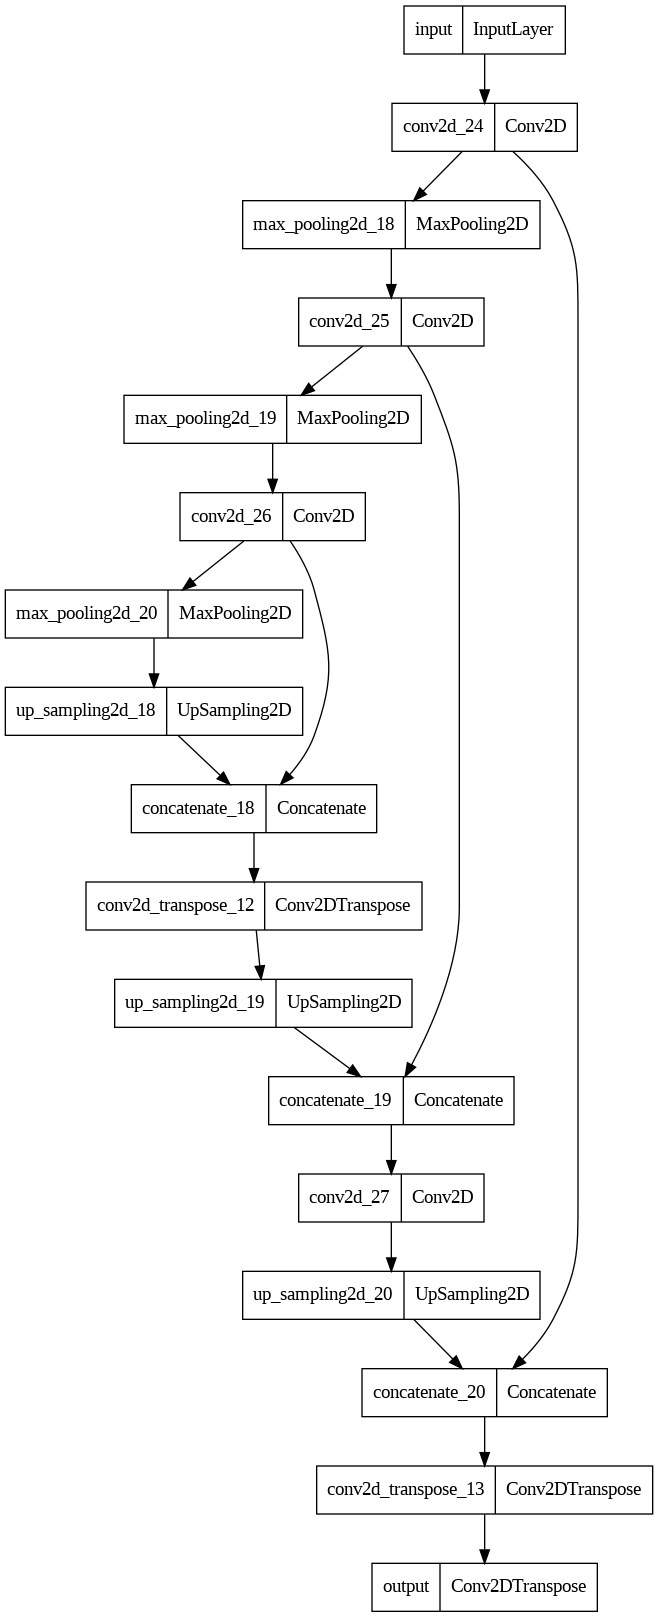

In [ ]:
tf.keras.utils.plot_model(model)


In [ ]:
# Combine generators into one generator


# Example usage in training:
model.fit(X_train,Y_train, batch_size=8,epochs=100)


Epoch 1/100
13/13 [==============================] - 4s 87ms/step - loss: 0.0944 - accuracy: 0.7677
Epoch 2/100
13/13 [==============================] - 1s 81ms/step - loss: 0.0562 - accuracy: 0.8158
Epoch 3/100
13/13 [==============================] - 1s 81ms/step - loss: 0.0392 - accuracy: 0.8460
Epoch 4/100
13/13 [==============================] - 1s 81ms/step - loss: 0.0262 - accuracy: 0.8565
Epoch 5/100
13/13 [==============================] - 1s 82ms/step - loss: 0.0207 - accuracy: 0.8623
Epoch 6/100
13/13 [==============================] - 1s 82ms/step - loss: 0.0180 - accuracy: 0.8621
Epoch 7/100
13/13 [==============================] - 1s 84ms/step - loss: 0.0200 - accuracy: 0.8617
Epoch 8/100
13/13 [==============================] - 1s 84ms/step - loss: 0.0189 - accuracy: 0.8616
Epoch 9/100
13/13 [==============================] - 1s 82ms/step - loss: 0.0156 - accuracy: 0.8629
Epoch 10/100
13/13 [==============================] - 1s 82ms/step - loss: 0.0145 - accuracy: 0.8635

4/4 [==============================] - 0s 111ms/step


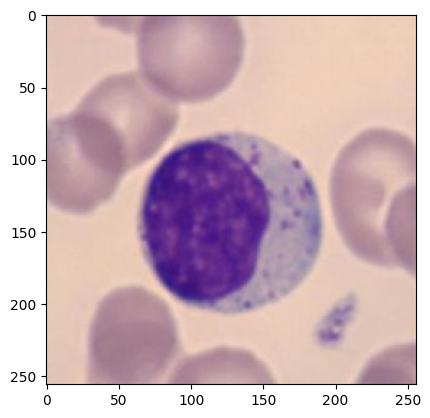

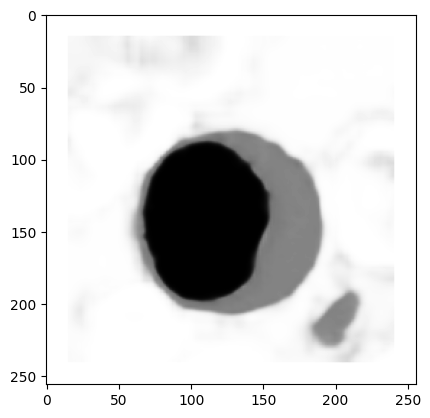

In [ ]:
reconstructed = model.predict(X_train)
plt.imshow(tf.squeeze(X_train[0]))
plt.show()
plt.imshow(tf.squeeze(reconstructed[0]*255))
plt.show()

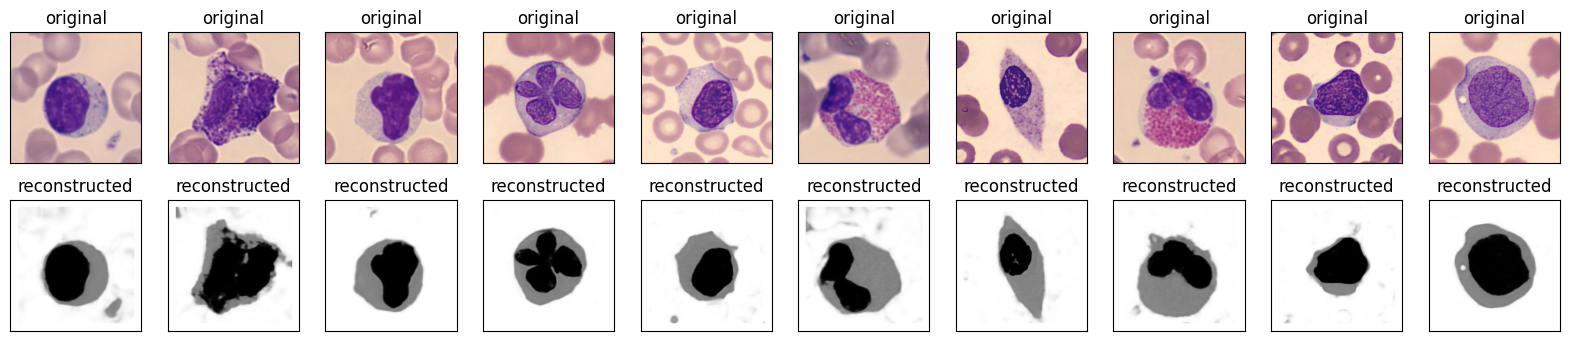

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(X_train[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(reconstructed[i])*255)
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()